In [1]:
import pandas as pd
import seaborn as sb
import statistics as sts

In [2]:
#importar dados do tempo e realizar a limpeza e tratamento dos dados 

In [3]:
dataset = pd.read_csv("tempo.csv", sep=";")
dataset.head()

#observa-se que os nomes estão deslocados; 

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [4]:
dataset.shape


(14, 5)

In [5]:

dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [8]:
agrupado_temperatura=dataset.groupby(['Temperatura']).size()
agrupado_temperatura

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

<AxesSubplot:xlabel='Temperatura'>

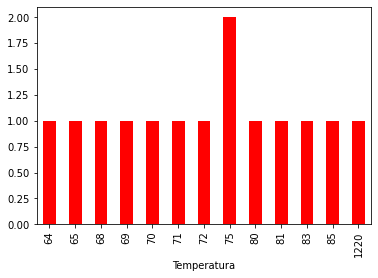

In [9]:
agrupado_temperatura.plot.bar(color='red')

In [13]:
agrupado=dataset.groupby(["Vento"]).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [19]:
dataset.columns = ["Aparencia","Temperatura","Umidade","Vento","Jogar"]
agrupado_ap=dataset.groupby(['Aparencia']).size()
agrupado_ap


Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

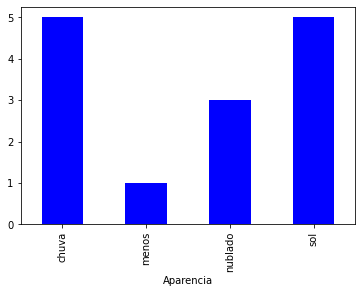

In [20]:
agrupado_ap.plot.bar(color="blue")

In [21]:
dataset["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

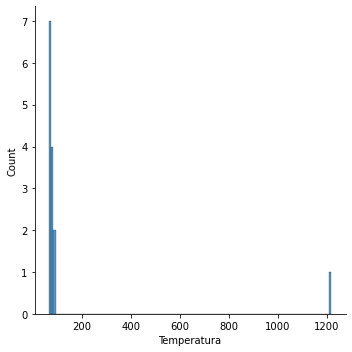

In [23]:
sb.displot(dataset["Temperatura"])


In [25]:
#mostrando valores nulos para depois substituir(valor categórico vira moda, valor numérico vira média ou mediana)
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [36]:
dataset["Umidade"].describe()
mediana_umidade=85

In [28]:
agrupado=dataset.groupby(["Umidade"]).size()
agrupado
#valor inconsistente de 200

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

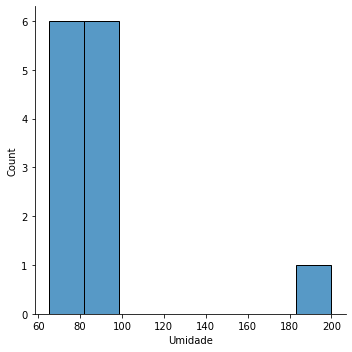

In [29]:
sb.displot(dataset["Umidade"])

C:\Users\gianc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Umidade'>

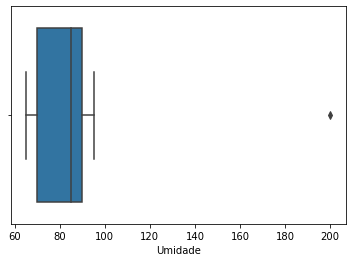

In [30]:
sb.boxplot(dataset["Umidade"])

In [32]:
agrupado=dataset.groupby(["Vento"]).size()
agrupado
#tudo ok

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [34]:
agrupado=dataset.groupby(["Jogar"]).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

In [40]:
#tratando valores nulos, substituindo pela mediana
dataset["Umidade"].fillna(mediana_umidade, inplace=True)
dataset["Umidade"].isnull().sum()

0

In [41]:
#tratando valores nulos do vento 
dataset["Vento"].fillna("FALSO", inplace=True)
dataset["Vento"].isnull().sum()

0

73.5

In [49]:
#Tratando outlier na Temperatura 
mediana_temp = sts.median(dataset['Temperatura'])
mediana_temp
dataset.loc[(dataset["Temperatura"]>100),"Temperatura"]= mediana_temp
dataset.groupby(["Temperatura"]).size()

Temperatura
64.0    1
65.0    1
68.0    1
69.0    1
70.0    1
71.0    1
72.0    1
73.5    1
75.0    2
80.0    1
81.0    1
83.0    1
85.0    1
dtype: int64

In [67]:
#Tratando outlier na Umidade
mediana_umidade = sts.median(dataset['Umidade'])
mediana_umidade
dataset.loc[(dataset["Umidade"]>130),"Umidade"]= mediana_umidade
dataset.groupby(["Umidade"]).size()

Umidade
65.0    1
70.0    3
75.0    1
80.0    1
85.0    3
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64

In [64]:
#tratando aparencia 

dataset.loc[dataset['Aparencia'].isin( ['menos']), 'Aparencia'] = "sol"

In [65]:
agrupado=dataset.groupby(["Aparencia"]).size()
agrupado

Aparencia
Sol        1
chuva      5
nublado    3
sol        5
dtype: int64